# **Stock Price Prediction using LSTM**  

### **Presented by:** Rajiv Ranjan (055038) & Arnav Mehra (055030)  
### **Group No.:** 12  

---

## **1. Project Information**
This project aims to predict the future stock prices of **Tata Consultancy Services (TCS)** using **Long Short-Term Memory (LSTM) neural networks**. LSTMs are widely used for time-series forecasting due to their ability to capture long-term dependencies in data.

The goal is to build a reliable model that can forecast stock prices based on historical data and evaluate its performance using various metrics such as **R² score** and **Mean Absolute Error (MAE)**.

---

## **2. Description of Data**

The dataset used in this project was obtained from **Yahoo Finance** using the `yfinance` library. It contains the historical stock prices for **TCS India (TCS.NS)** from **2010-01-01** to the present day. The dataset includes:

- **Date**: The date on which the stock data was recorded.
- **Open**: The opening stock price of the day.
- **High**: The highest price the stock reached on that day.
- **Low**: The lowest price the stock reached on that day.
- **Close**: The closing price of the stock at the end of the trading session.
- **Volume**: The total number of shares traded on that day.

The dataset contains **3762 rows** and **6 columns**.

---

## **3. Project Objective**

The main objectives of this project are:
- Build and train an **LSTM model** to predict future stock prices.
- Preprocess and prepare the dataset for time-series forecasting.
- Evaluate the model using **performance metrics**.
- Visualize the actual vs predicted stock prices.

---

## **4. Data Analysis**

### **Data Preprocessing**
- The **Date** column was dropped as it was not required for modeling.
- Moving averages (**100-day and 200-day**) were calculated to analyze long-term trends.
- The dataset was split into **training** (70%) and **testing** (30%) sets.
- **Normalization** was applied using `MinMaxScaler` to scale stock prices between 0 and 1.

### **Feature Engineering**
- The data was transformed into sequences of **100 consecutive days** as input features, with the next day's price as the target.

---

## **5. Model Design and Architecture**

The model is a **Sequential LSTM network** with the following architecture:

1. **Input Layer**: Sequences of 100 days (shape: `(100,1)`).
2. **First LSTM Layer**:
   - Units: 50
   - Activation: **ReLU**
   - Dropout: 20%
   - `return_sequences=True`
3. **Second LSTM Layer**:
   - Units: 60
   - Activation: **ReLU**
   - Dropout: 30%
   - `return_sequences=True`
4. **Third LSTM Layer**:
   - Units: 80
   - Activation: **ReLU**
   - Dropout: 40%
   - `return_sequences=True`
5. **Fourth LSTM Layer**:
   - Units: 120
   - Activation: **ReLU**
   - Dropout: 50%
6. **Dense Output Layer**:
   - Units: 1 (predicted stock price).

### **Training Process**
- **Optimizer**: Adam
- **Loss Function**: Mean Squared Error (MSE)
- **Epochs**: 100

---

## **6. Model Evaluation**

### **Predictions**
- The trained model was used to predict stock prices on the test dataset.
- The predictions were **scaled back to the original price range** using the inverse transform of `MinMaxScaler`.

### **Performance Metrics**
- **R² Score**: **0.97** (indicating excellent model performance)
- **Mean Absolute Error (MAE)**: Very low error, meaning the predicted prices are close to actual prices.

### **Visualizations**
- **Comparison Plot**: Actual vs predicted stock prices.
- **Scatter Plot**: Actual vs predicted values with a reference line.

---

## **7. Observations & Findings**

- The **LSTM model** performed exceptionally well with an **R² score of 0.97**, indicating that it captured 97% of the variance in stock prices.
- The scatter plot showed a strong correlation between actual and predicted values.
- Moving averages provided useful insights into long-term trends.
- **Regularization** techniques (dropout layers) helped prevent overfitting.

---

## **8. Conclusion**

This project successfully demonstrated the use of **LSTM networks** for stock price forecasting. The model was able to accurately predict **TCS stock prices** with high accuracy. The results indicate that LSTMs are effective for time-series forecasting tasks.

### **Future Enhancements**
- Incorporating **external factors** like **news sentiment** and **macro-economic indicators**.
- Using **other deep learning architectures** like Transformer models for time-series forecasting.
- Fine-tuning the **hyperparameters** further to improve accuracy.

This model provides a solid foundation for stock price prediction and can be extended to other financial instruments as well.

---


# Import all the required libraries

---

In [36]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [37]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [44]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,282.049713,284.770209,281.074073,283.231708,1963682
1,2010-01-05,282.124756,285.014114,280.135984,283.306773,2014488
2,2010-01-06,275.745575,282.256014,275.051389,282.124666,3349176
3,2010-01-07,268.071869,277.452883,266.796042,275.989436,6474892
4,2010-01-08,262.593445,269.610451,261.355155,268.672349,6048178


Visualizing Closing Price

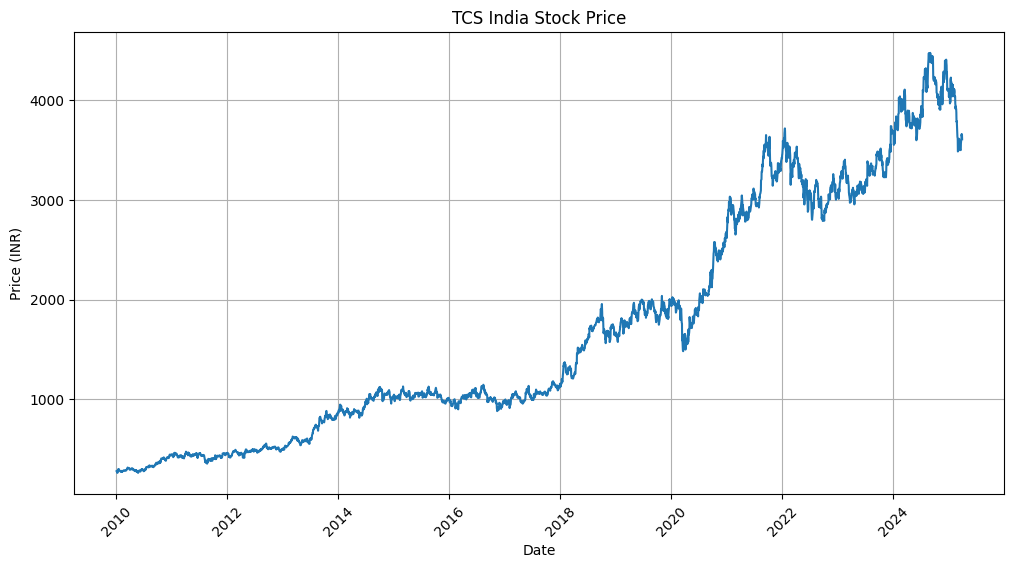

In [45]:
# Ensure you have the Date column in 'df' for plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels to avoid overlap
plt.show()


In [46]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,282.049713,284.770209,281.074073,283.231708,1963682
1,2010-01-05,282.124756,285.014114,280.135984,283.306773,2014488
2,2010-01-06,275.745575,282.256014,275.051389,282.124666,3349176
3,2010-01-07,268.071869,277.452883,266.796042,275.989436,6474892
4,2010-01-08,262.593445,269.610451,261.355155,268.672349,6048178
...,...,...,...,...,...,...
3757,2025-03-24,3628.949951,3649.750000,3566.600098,3600.000000,1834751
3758,2025-03-25,3657.750000,3710.000000,3638.000000,3645.000000,3135390
3759,2025-03-26,3635.800049,3680.500000,3625.850098,3647.750000,1734499


# Plotting moving averages of 100 day

---



In [47]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3757,3999.901472
3758,3996.273386
3759,3993.569565
3760,3990.864717


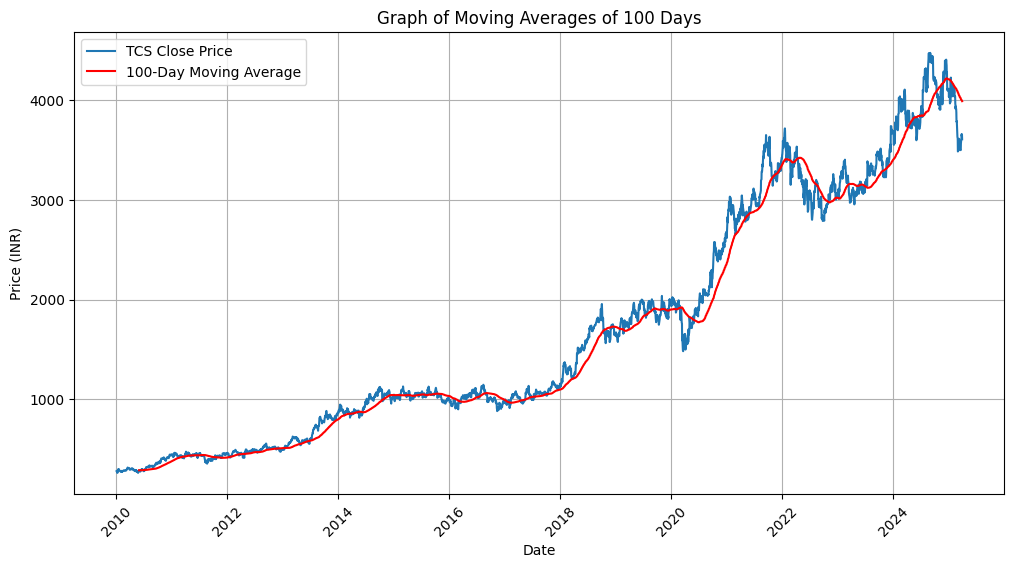

In [49]:
# Make sure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label="TCS Close Price")
plt.plot(df['Date'], ma100, 'r', label="100-Day Moving Average")
plt.title("Graph of Moving Averages of 100 Days")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.show()


# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [50]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3757,4063.725664
3758,4063.252378
3759,4062.358060
3760,4061.713405


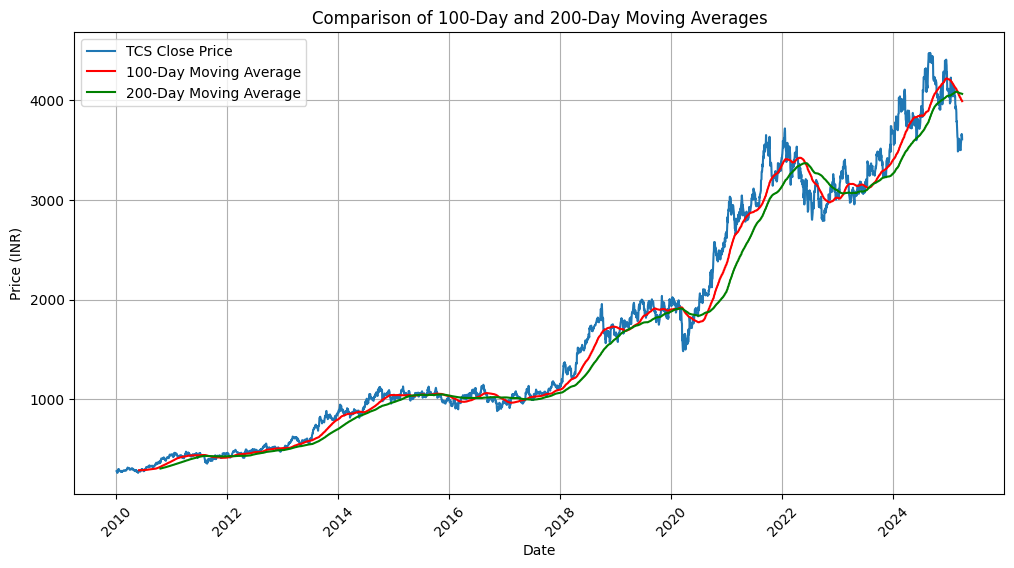

In [52]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plot the Close price, 100-day MA, and 200-day MA
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label="TCS Close Price")
plt.plot(df['Date'], ma100, 'r', label="100-Day Moving Average")
plt.plot(df['Date'], ma200, 'g', label="200-Day Moving Average")
plt.title('Comparison of 100-Day and 200-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.show()


In [53]:
df.shape

(3762, 6)

# Spliting the dataset into training (70%) and testing (30%) set

In [54]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2633, 6)
(1129, 6)


In [55]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,282.049713,284.770209,281.074073,283.231708,1963682
1,2010-01-05,282.124756,285.014114,280.135984,283.306773,2014488
2,2010-01-06,275.745575,282.256014,275.051389,282.124666,3349176
3,2010-01-07,268.071869,277.452883,266.796042,275.989436,6474892
4,2010-01-08,262.593445,269.610451,261.355155,268.672349,6048178


In [56]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2633,2020-09-08,2137.731445,2176.194590,2118.477203,2126.579409,7453998
2634,2020-09-09,2119.023438,2147.563637,2112.059193,2116.611045,3866535
2635,2020-09-10,2122.209961,2138.004977,2115.974057,2125.714976,2308813
2636,2020-09-11,2161.311035,2169.413245,2121.300068,2122.028409,4145424
2637,2020-09-14,2268.096680,2281.160584,2168.365782,2170.414116,7512131


# Using MinMax scaler for normalization of the dataset

---



In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [59]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [22]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01032584],
       [0.01036651],
       [0.00972617],
       ...,
       [0.97534299],
       [0.97879521],
       [0.9856991 ]])

In [60]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [61]:
x_train.shape

(2533, 100, 1)

# ML Model (LSTM)

---



In [62]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [63]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [65]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - loss: 0.0747 - mean_absolute_error: 0.1900
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 0.0101 - mean_absolute_error: 0.0685
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0067 - mean_absolute_error: 0.0564
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0065 - mean_absolute_error: 0.0567
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0068 - mean_absolute_error: 0.0564
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0060 - mean_absolute_error: 0.0520
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0062 - mean_absolute_error: 0.0501
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0045 - mean_absolute_error: 0.0447
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0046 - mean_absolute_error: 0.0457
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0038 - mean_absolute_error: 0.0420
Epoch 11/100
80/80 ━━━━━━━━

In [69]:
model.save('keras_model.h5')

In [70]:
test_close.shape

(1129, 1)

In [71]:
past_100_days = pd.DataFrame(train_close[-100:])

In [73]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [75]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [76]:
final_df.head()

,0
0,1630.207274
1,1657.377240
2,1598.508594
3,1573.738880
4,1612.093785


In [77]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01934181],
       [0.02864819],
       [0.00848424],
       ...,
       [0.71039973],
       [0.69913071],
       [0.71151294]])

In [78]:
input_data.shape

(1229, 1)

# Testing the model

---



In [79]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [80]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1129, 100, 1)
(1129,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [81]:
# Making predictions

y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step


In [82]:
y_pred.shape

(1129, 1)

In [83]:
y_test

array([0.18936146, 0.18594705, 0.18906537, ..., 0.71039973, 0.69913071,
       0.71151294])

In [84]:
y_pred

array([[0.21727867],
       [0.2174863 ],
       [0.21801424],
       ...,
       [0.67298126],
       [0.68629086],
       [0.7004979 ]], dtype=float32)

In [85]:
scaler.scale_

array([0.00034252])

In [86]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

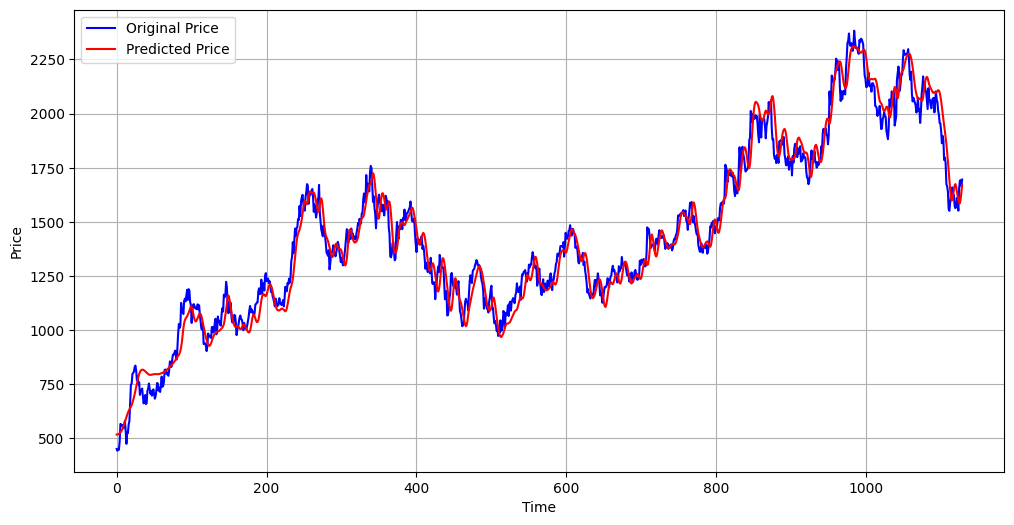

In [87]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [88]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 3.83%


Calculation of R2 score

In [92]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9697729170266512


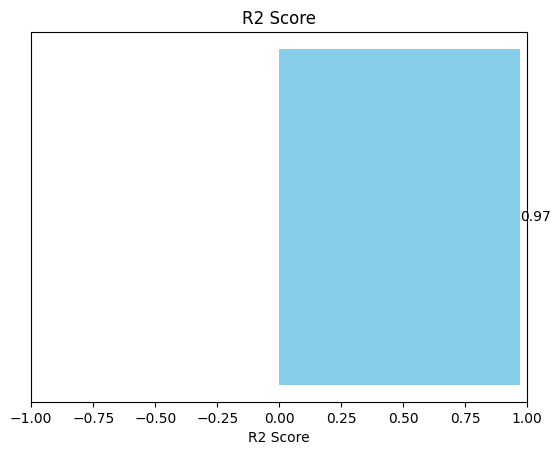

In [90]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

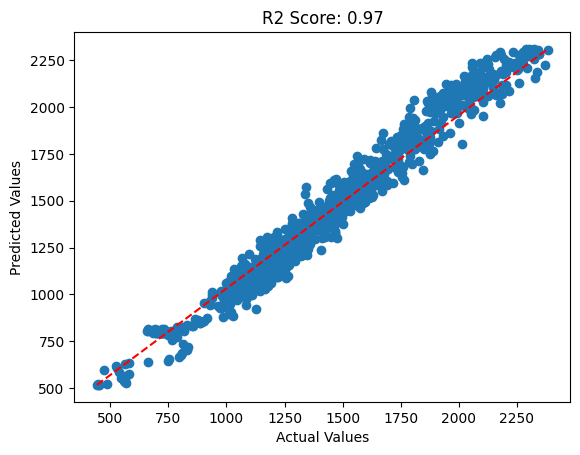

In [91]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()